In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from os.path import join

In [2]:
%run ../tools/echelle.py
cb = Calibrations('../calibration_files')

In [3]:
cb.start() 

In [4]:
%run ../tools/echelle.py

pth = r'../data/CCD_Example.SIF'
em = EchelleImage(pth,clbr=cb)

In [5]:
em.calculate_order_spectra()
print(em.order_spectra.shape)
a = em.order_spectra.copy()
em.correct_order_shapes()
print(em.order_spectra.shape)
b = em.order_spectra.copy()

(30, 28, 1024)
(30, 28, 1024)


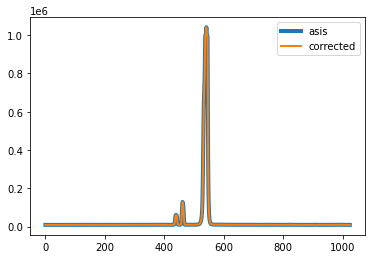

In [6]:
# I forgot what I did here
frame = 3
o = 6
plt.plot(a[frame,o],lw=4,label='asis')
plt.plot(b[frame,o],lw=2,ls='-',label='corrected')
plt.legend()

In [7]:
# Prepare spectra for all frames
em.calculate_order_spectra()
em.correct_order_shapes()
em.calculate_spectra()
#em.plot_order_image(28,6,20)

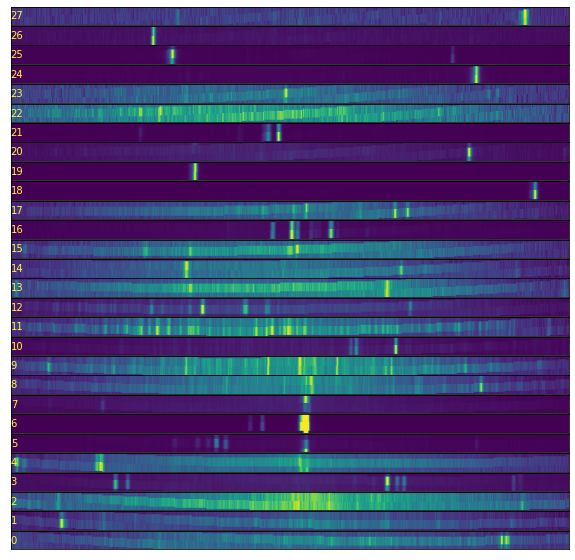

In [8]:
# Plot diffraction orders for a given frame
frame = 7
em.plot_cut_image(frame,2)
plt.gcf().set_size_inches(10,10)
#savefig('CCD_cut.png',dvi=300,pad_inches=0,bbox_inches='tight')

Text(0, 0.5, 'vertical pixel number')

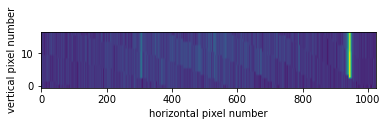

In [9]:
# Plot one diffraction order
em.plot_order_image(7,27,10)
plt.xlabel('horizontal pixel number')
plt.ylabel('vertical pixel number')

Text(0.5, 0, 'pixel number')

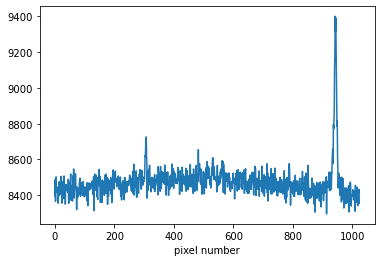

In [10]:
plt.plot(em.order_spectra[7,27,:])
plt.xlabel('pixel number')

In [11]:
# Convert an image inot spectra
s = Spectrum(em)

Text(0.5, 0, 'Wavelength, nm')

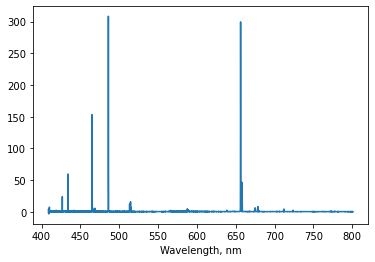

In [12]:
# Calibrated spectrum
frame = 6
x = s.wavelength
y = s.spectra_to_save['wm'][frame]
plt.plot(x,y)
plt.xlabel('Wavelength, nm')

# Wavelength vs accumulated pixel number
Accumulated pixel number: cut images for each diffraction order are stacked to 
form a contineous spectrum. The overlapping parts are cut, and a contineous spectrum is stored.

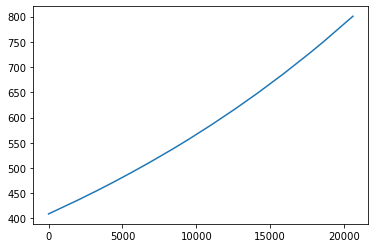

In [13]:
plt.plot(x)